# Twitter Automation Scanner - Semantic Content analysis

## Step 1 - Install required dependencies

- [langdetect](https://github.com/Mimino666/langdetect) - langugage detection library
- [matplotlib](https://matplotlib.org) - Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible.
- [wordcloud](https://github.com/amueller/word_cloud) - A little word cloud generator in Python

In [2]:
pip install langdetect matplotlib wordcloud

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Step 2 - Load source JSON file

In [3]:
import json
import os

folder_walk = os.walk('sourcedata/user')
first_file_in_folder = next(folder_walk)[2][0]

report_file = open(f'{ os.getcwd() }/sourcedata/user/{first_file_in_folder}')
user_data = json.load(report_file)

## Step 3 - Detect the user language

In [8]:
from langdetect import detect_langs

separator = ' '
tweets = list()

for tweet in user_data['tweets']:
    tweets.append(tweet['text'])

merged_user_posts = separator.join(tweets)
detected_langs_result = detect_langs(merged_user_posts)

print( 'For the provided report used language probabilities are:' )
for result in detected_langs_result:
    probability = round(result.prob * 100, 4)
    print(f'Detected language is { result.lang } with probability { probability }%')



For the provided report used language probabilities are:
Detected language is pl with probability 99.9998%


## Step 4 - Prepare a word cloud

(-0.5, 2999.5, 1999.5, -0.5)

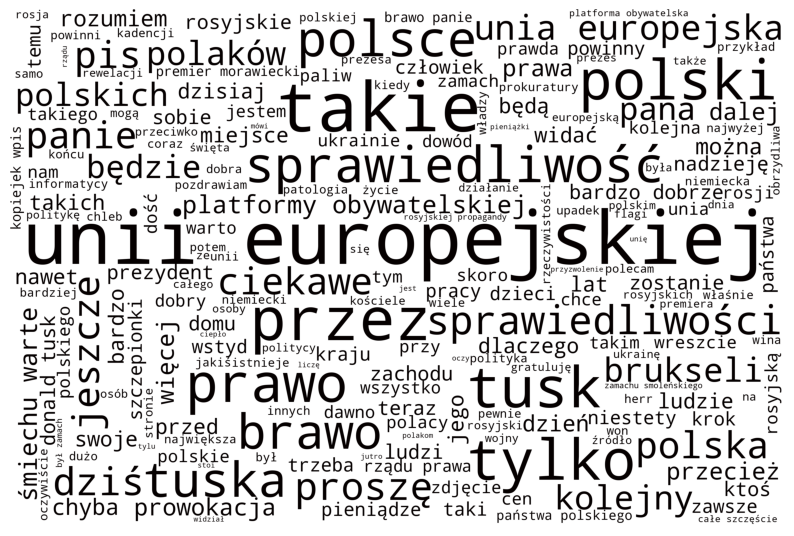

In [34]:
import re

import matplotlib.pyplot as plt
from wordcloud import WordCloud

def black_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(0,100%, 1%)")

skip_words = [
    'nie', 't', 'się', 'co', 'że', 'na', 'z', 'jest', 'w', 'po', 'o', 'rt', 'dla', 'za', 'tym', 'mają', 'może', 'jego'
    'tak', 'nie', 'ma', 'czy', 'jak', 'już', 'kto', 'być', 'są', 'tej', 'jako', 'ale', 'tego', 'od', 'jej',
    'ich', 'go', 'pod', 'nad', 'ten', 'ja', 'nic', 'gdyby', 'bez', 'nich', 'pan', 'pani', 'im', 'tak', 'też', 'że',
    'ci', 'tę' ,'te', 'bo', 'dlatego', 'ponieważ', 'oraz', 'gdyż', 'u', 'coś', 'mnie', 'niż', 'jaka', 'gdy', 'się',
    'aby', 'żeby', 'by', 'oby', 'tych', 'tam', 'tu', 'które', 'której', 'którego', 'którym', 'ile', 'mam', 'ta',
    'jest', 'sam', 'niby', 'którzy', 'oni', 'jakieś'
] 

merged_tweets = separator.join(tweets).lower()

merged_tweets = re.sub(r'http\S+', '', merged_tweets)

words = merged_tweets.split()

trimmed_words = list()

for word in words:
    if word not in skip_words and not word.startswith('@'):
        trimmed_words.append( word )

text = ' '.join(trimmed_words)

wordcloud = WordCloud(background_color="white", width=3000, height=2000).generate(text)

wordcloud.recolor(color_func = black_color_func)

plt.figure(figsize=[10, 15])

plt.imshow(wordcloud)

plt.axis("off")